In [304]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy.dialects.mssql.information_schema import columns
from statsmodels.graphics.gofplots import qqplot

RAW_PATH = "D:/DA project/sales-analytics-project/data/raw/olist_products_dataset.csv"

In [305]:
df=pd.read_csv(RAW_PATH,
               dtype={'product_category_name':'string'},
               parse_dates=False
               )

In [306]:
df.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [307]:
df.dtypes

product_id                            object
product_category_name         string[python]
product_name_lenght                  float64
product_description_lenght           float64
product_photos_qty                   float64
product_weight_g                     float64
product_length_cm                    float64
product_height_cm                    float64
product_width_cm                     float64
dtype: object

In [308]:
df.shape

(32951, 9)

In [309]:
#Null Values per column
df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [310]:
#Total null values
df.isnull().sum().sum()

np.int64(2448)

In [311]:
#Null Value Percentage in per columns in Dataset
(df.isnull().sum()/df.shape[0])*100

product_id                    0.000000
product_category_name         1.851234
product_name_lenght           1.851234
product_description_lenght    1.851234
product_photos_qty            1.851234
product_weight_g              0.006070
product_length_cm             0.006070
product_height_cm             0.006070
product_width_cm              0.006070
dtype: float64

In [312]:
#Null percentage in overall dataset
(df.isnull().sum().sum()/(df.shape[0]*df.shape[1]))*100

np.float64(0.8254681193287002)

In [313]:
#decession

| % Null Records | Action                     | Reason                              |
| -------------- | -------------------------- | ----------------------------------- |
| <1%            | Drop                       | Negligible data loss                |
| 1-5%           | Create "UNKNOWN" category  | Preserves data, flags quality issue |
| >5%            | ALERT! Data quality crisis | Investigate upstream ETL process    |

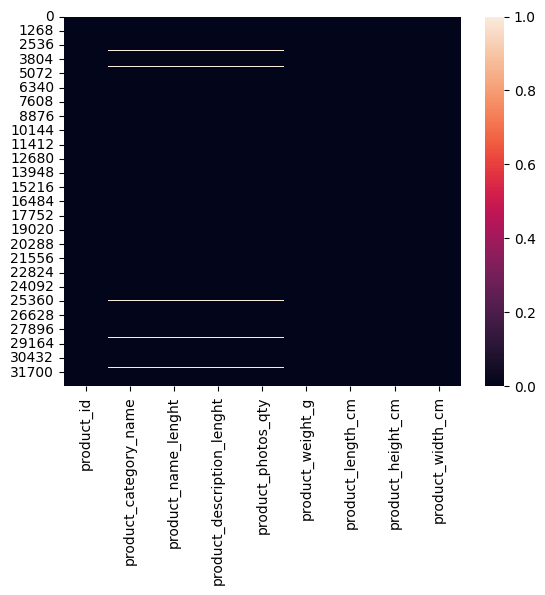

In [314]:
sns.heatmap(df.isnull())
plt.show()

In [315]:
## since the #["product_weight_g","product_length_cm","product_width_cm","product_height_cm"] columns has very small null value w which is <1% so we are going to delete then

In [316]:
df.shape

(32951, 9)

In [317]:
cols=["product_weight_g","product_length_cm","product_width_cm","product_height_cm"]

In [318]:
df=df.dropna(axis=0, how='any',subset=cols)

In [319]:
df.shape

(32949, 9)

In [320]:
df.isnull().sum()

product_id                      0
product_category_name         609
product_name_lenght           609
product_description_lenght    609
product_photos_qty            609
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
dtype: int64

In [321]:
df['product_category_name']=df['product_category_name'].str.lower().str.replace("_"," ")

In [322]:
df['product_category_name']=df['product_category_name'].astype('category')

In [323]:
df['product_category_name'].isnull().value_counts()

product_category_name
False    32340
True       609
Name: count, dtype: int64

In [325]:
df.dtypes

product_id                      object
product_category_name         category
product_name_lenght            float64
product_description_lenght     float64
product_photos_qty             float64
product_weight_g               float64
product_length_cm              float64
product_height_cm              float64
product_width_cm               float64
dtype: object

In [327]:
"""product_category_name      609
product_name_lenght           609
product_description_lenght    609
product_photos_qty            609 """

#above columns have null value percentage greather than 1  so we are going to keep then
# out of the 4 columns we only need product_category_name for our analysis so we are going to flag only this columns w

df['has_Unknown_category']=(df['product_category_name'].isna())

In [333]:
""" we are keeeping the other 3 rows only because we might need then for
A/B Testing: "Does 50-char vs 100-char titles convert better?"
SEO Analysis: "Do longer descriptions rank higher?"
ML Features: Product similarity / recommendation systems"""

In [335]:
df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340.000000,32340.000000,32340.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476592,771.492393,2.188961,2276.472488,30.815078,16.937661,23.196728
std,10.245699,635.124831,1.736787,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000
